In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

## Data Visualization

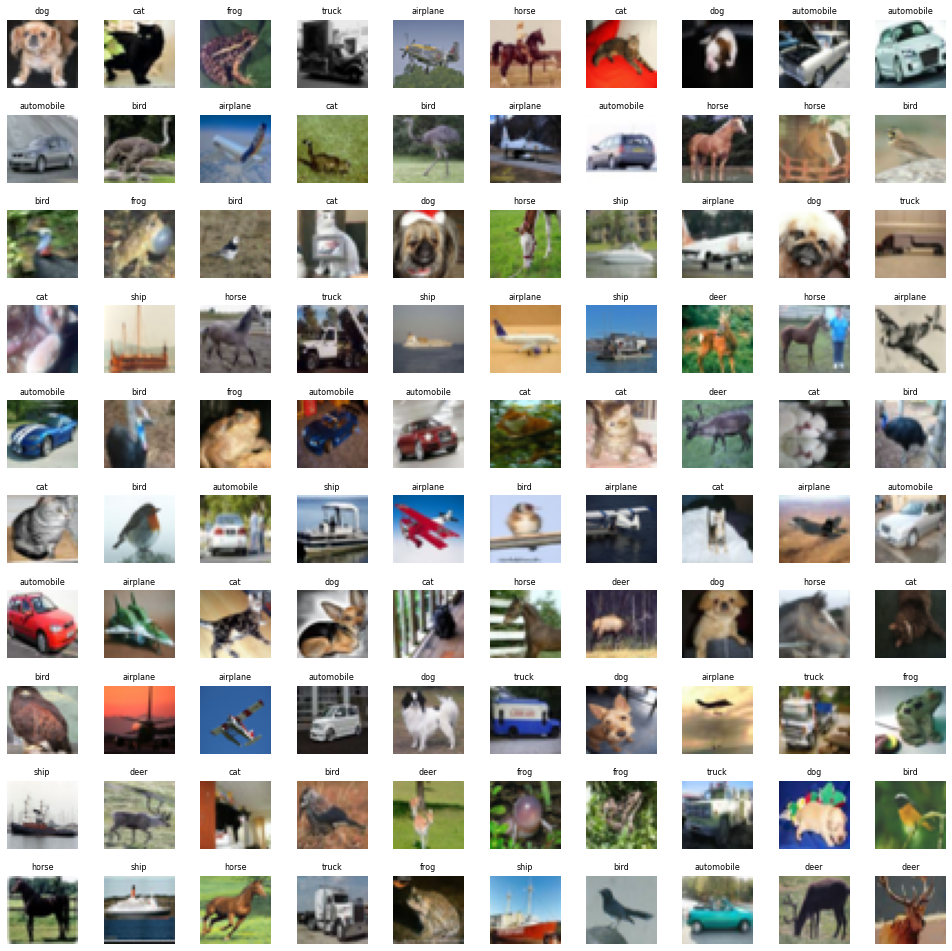

In [5]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(X_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

## Data Preprocessing

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0

y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [8]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

## Model Creation

In [11]:
cnn = tf.keras.models.Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3), padding='same'),
        BatchNormalization(),
        Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
        BatchNormalization(),    
        
        MaxPool2D(pool_size=(2,2)),
        Dropout(0.25),
    
        
        Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3), padding='same'),
        BatchNormalization(),
        Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        BatchNormalization(),    
        
        MaxPool2D(pool_size=(2,2)),
        Dropout(0.25),
    
    
        Conv2D(filters=128, kernel_size=(3,3), activation='relu', input_shape=(32,32,3), padding='same'),
        BatchNormalization(),
        Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
        BatchNormalization(),    
        
        MaxPool2D(pool_size=(2,2)),
        Dropout(0.25),

    
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.25),
        Dense(10, activation='softmax')
    ])

In [12]:
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

In [13]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_3 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 64)        1

## Early Stopping

In [15]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

## Data Augmentations

In [17]:
batch_size = 10
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size
max_epochs = 50

In [29]:
r = cnn.fit(X_train, y_cat_train,
        epochs=50, 
        batch_size=batch_size,
        callbacks=[early_stopping],
        validation_data=(X_test,y_cat_test),
        verbose = 1
       )  

Epoch 1/50
5000/5000 [==============================] - 481s 96ms/step - loss: 0.4532 - accuracy: 0.8446 - precision: 0.8888 - recall: 0.8055 - val_loss: 0.4771 - val_accuracy: 0.8413 - val_precision: 0.8814 - val_recall: 0.8101
Epoch 2/50
5000/5000 [==============================] - 549s 110ms/step - loss: 0.4372 - accuracy: 0.8487 - precision: 0.8912 - recall: 0.8103 - val_loss: 0.4680 - val_accuracy: 0.8463 - val_precision: 0.8803 - val_recall: 0.8188
Epoch 3/50
5000/5000 [==============================] - 511s 102ms/step - loss: 0.4274 - accuracy: 0.8519 - precision: 0.8937 - recall: 0.8156 - val_loss: 0.4700 - val_accuracy: 0.8431 - val_precision: 0.8814 - val_recall: 0.8143
Epoch 4/50
5000/5000 [==============================] - 507s 101ms/step - loss: 0.4193 - accuracy: 0.8559 - precision: 0.8969 - recall: 0.8208 - val_loss: 0.4795 - val_accuracy: 0.8489 - val_precision: 0.8783 - val_recall: 0.8251


## Model Evaluation

In [30]:
y_pred = cnn.predict(X_test)

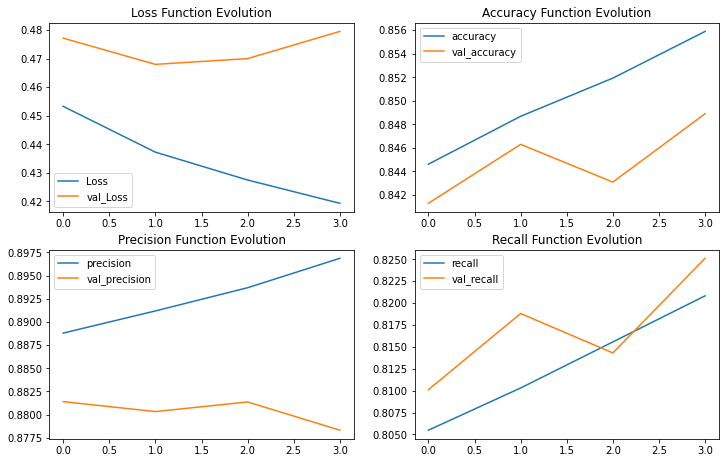

In [31]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

In [32]:
evaluation = cnn.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

313/313 [==============================] - 17s 53ms/step - loss: 0.4795 - accuracy: 0.8489 - precision: 0.8783 - recall: 0.8251
Test Accuracy : 84.89%


## Confusion Matrix

In [33]:
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)

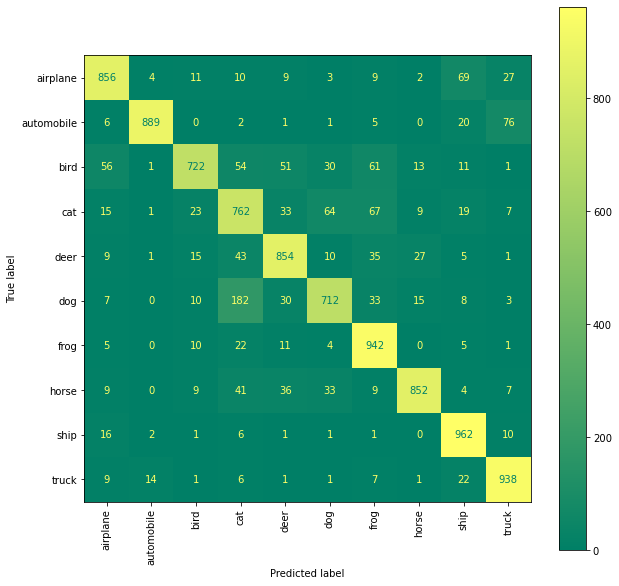

In [34]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1000
           1       0.97      0.89      0.93      1000
           2       0.90      0.72      0.80      1000
           3       0.68      0.76      0.72      1000
           4       0.83      0.85      0.84      1000
           5       0.83      0.71      0.77      1000
           6       0.81      0.94      0.87      1000
           7       0.93      0.85      0.89      1000
           8       0.86      0.96      0.91      1000
           9       0.88      0.94      0.91      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



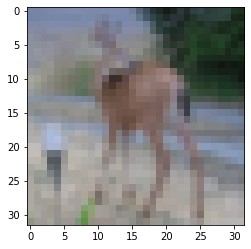

In [36]:
my_image = X_test[100]
plt.imshow(my_image)

In [37]:
y_test[100]

array([4], dtype=uint8)

In [39]:
np.argmax(cnn.predict(my_image.reshape(1, 32, 32, 3)))

7

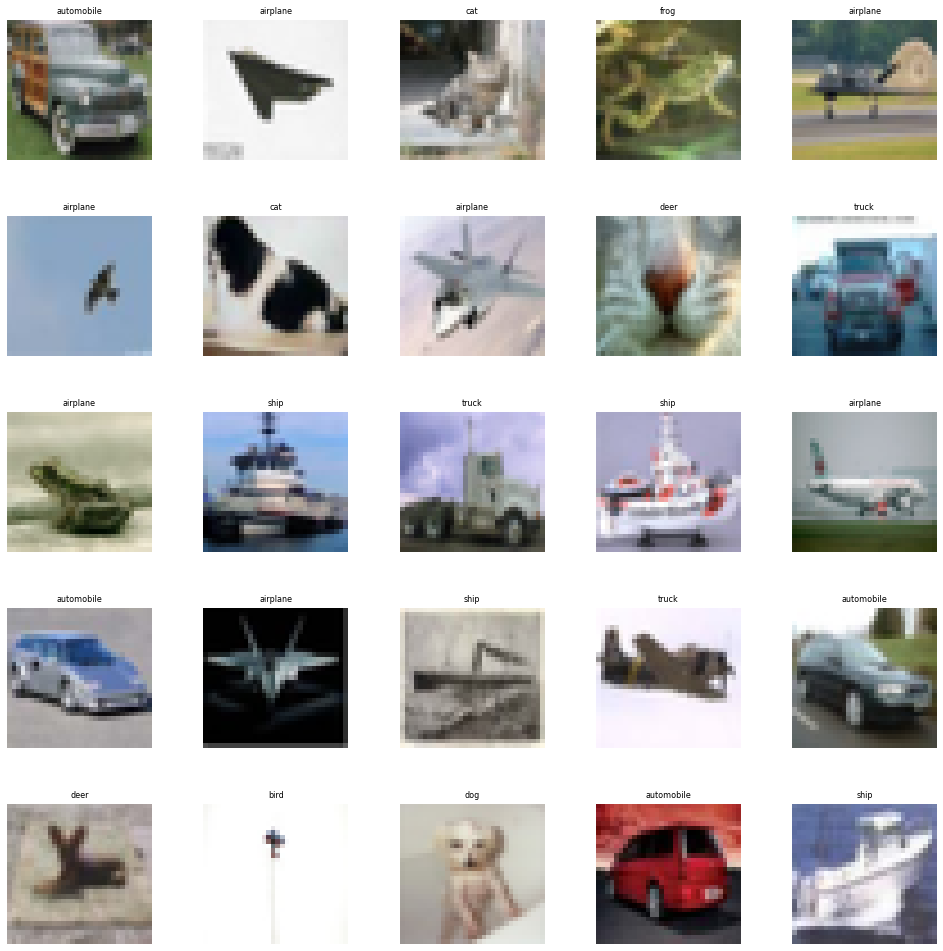

In [40]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_test = len(X_test) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_test)
    # read and display an image with the selected index    
    axes[i].imshow(X_test[index,1:])
    label_index = int(y_pred[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [41]:
predictions = cnn.predict(X_test)

In [42]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})", 
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

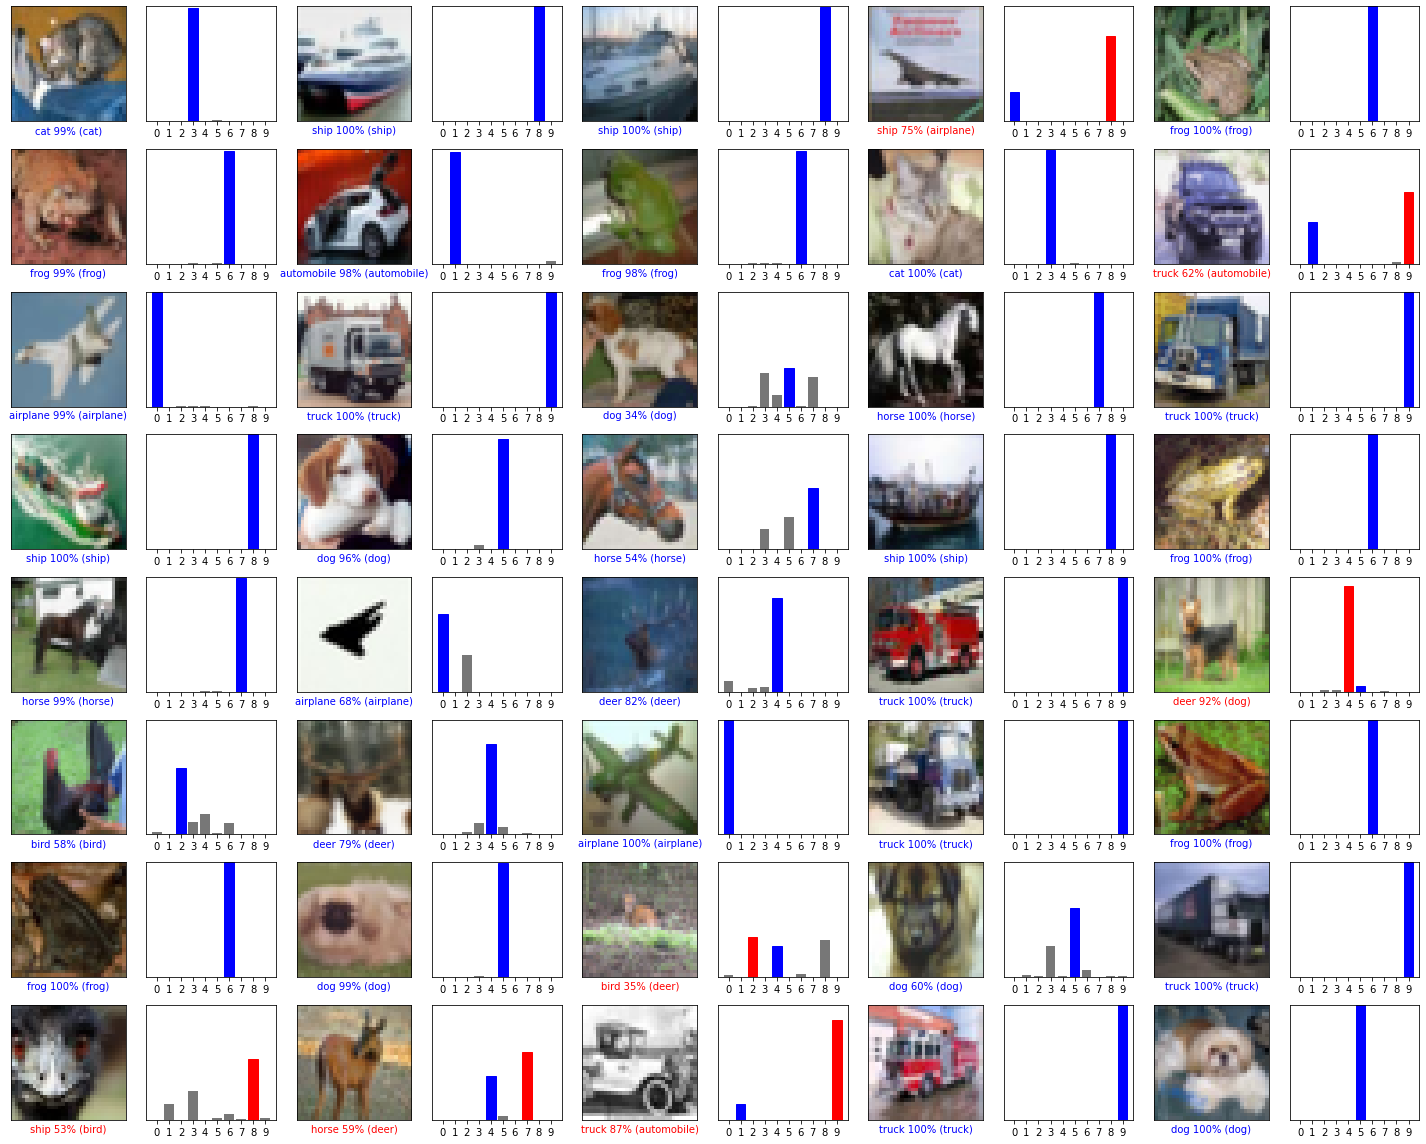

In [43]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 8
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()